This plots ROI values extracted from images that have been normalized using DARTEL, 
but the values have been extracted from ROI derived from a prior analysis done using images normalized using DARTEL.

In [28]:
%run /home/grg/git/alfa/nilearn-helper.py
%matplotlib inline
%run /home/grg/git/alfa/roicollect.py

This collect the values from \*\_stats.csv files, i.e. values that have been extracted from ROI manually drawn in MNI space.
The bad thing with this is that the ROI is defined in a reference space. This is subject to individual registration errors.

{1: 'Anterior thalamic radiation L', 2: 'Anterior thalamic radiation R', 3: 'Corticospinal tract L', 4: 'Corticospinal tract R', 5: 'Cingulum (cingulate gyrus) L', 6: 'Cingulum (cingulate gyrus) R', 7: 'Cingulum (hippocampus) L', 8: 'Cingulum (hippocampus) R', 9: 'Forceps major', 10: 'Forceps minor', 11: 'Inferior fronto-occipital fasciculus L', 12: 'Inferior fronto-occipital fasciculus R', 13: 'Inferior longitudinal fasciculus L', 14: 'Inferior longitudinal fasciculus R', 15: 'Superior longitudinal fasciculus L', 16: 'Superior longitudinal fasciculus R', 17: 'Uncinate fasciculus L', 18: 'Uncinate fasciculus R', 19: 'Superior longitudinal fasciculus (temporal part) L', 20: 'Superior longitudinal fasciculus (temporal part) R'}
groups ['HO', 'HT', 'NC']
Standard deviation of label Anterior thalamic radiation L: 0.0260938041179
Model used for correction: roi ~ 1 + gender
Standard deviation after correction for model roi ~ 1 + gender: 0.0258803694025
Region: Anterior thalamic radiation L
M

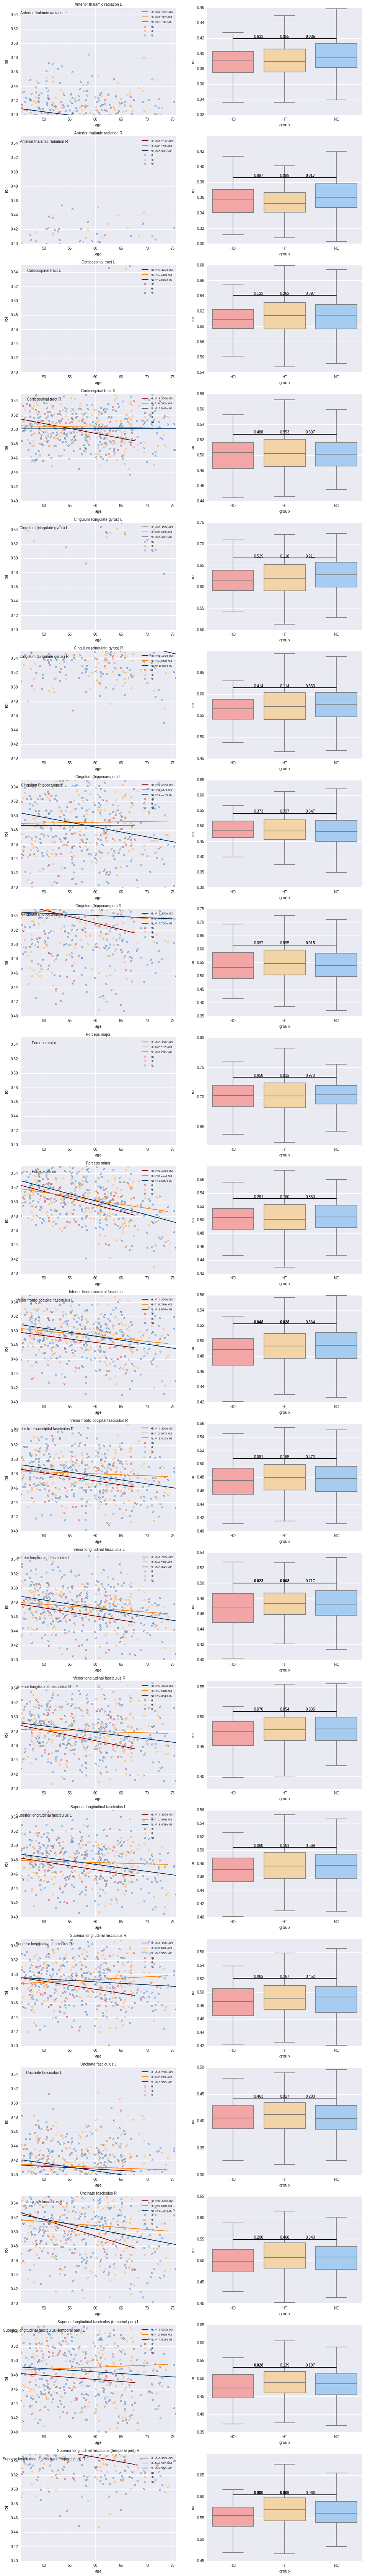

In [37]:
regions = range(1, 21)
#for x in [9]: #,10,11,12,13]:
#    regions.remove(x)
#regions=[7,8]
names = {1: 'Anterior thalamic radiation L',
 2: 'Anterior thalamic radiation R',
 3: 'Corticospinal tract L',
 4: 'Corticospinal tract R',
 5: 'Cingulum (cingulate gyrus) L',
 6: 'Cingulum (cingulate gyrus) R',
 7: 'Cingulum (hippocampus) L',
 8: 'Cingulum (hippocampus) R',
 9: 'Forceps major',
 10: 'Forceps minor',
 11: 'Inferior fronto-occipital fasciculus L',
 12: 'Inferior fronto-occipital fasciculus R',
 13: 'Inferior longitudinal fasciculus L',
 14: 'Inferior longitudinal fasciculus R',
 15: 'Superior longitudinal fasciculus L',
 16: 'Superior longitudinal fasciculus R',
 17: 'Uncinate fasciculus L',
 18: 'Uncinate fasciculus R',
 19: 'Superior longitudinal fasciculus (temporal part) L',
 20: 'Superior longitudinal fasciculus (temporal part) R'}

data = pd.read_excel('/tmp/covariates.xlsx')
data = data.set_index(data['subject'])
data = data.sort_values(['apo', 'subject'])
src = '/home/grg/tbss_bsc_subjects/roivalues_tracts_tbss_FA_skel/'
filepattern = '*_stats.csv'
csvfiles = glob(osp.join(src, filepattern))
subjects = [string.atoi(e.split('/')[-1].split('_')[0]) for e in csvfiles]

#import json
#j = json.load(open('/home/grg/spm/data/matched_groups.json'))
#subjects = []
#for each in j:
#    subjects.extend(each)

#df = pd.read_excel('/home/grg/spm/data/covariates.xls')
#subjects = list(df[df['apo']!=1]['subject'].values)
#csvfiles = []
#for s in subjects:
#    csvfp = glob(osp.join(src, '%s%s'%(s, filepattern)))[0]
#    csvfiles.append(csvfp)

values = collect_roivalues(3, csvfiles=csvfiles, subjects=subjects)

#data.join(values)
#poly = ols(formula='roi ~ 1 + age', data=data.join(values)).fit()
res = plot_regions(data, regions, csvfiles, subjects, groups=['HO','HT','NC'], by='apo', names=names,ylim=[0.4,0.55])

In [36]:
res

,roi_name,"(HO, HT)","(HO, NC)","(HT, NC)"
0,Anterior thalamic radiation L,0.477527,0.045412,0.079292
1,Anterior thalamic radiation R,0.885194,0.101766,0.044051
2,Corticospinal tract L,0.237801,0.270515,0.729395
3,Corticospinal tract R,0.533145,0.949736,0.372816
4,Cingulum (cingulate gyrus) L,0.724808,0.101179,0.088521
5,Cingulum (cingulate gyrus) R,0.432576,0.073600,0.220631
6,Cingulum (hippocampus) L,0.697407,0.894600,0.712905
7,Cingulum (hippocampus) R,0.314353,0.963095,0.112137
8,Forceps major,0.963505,0.941759,0.872116
9,Forceps minor,0.289296,0.103169,0.573131


In [35]:
res.to_excel('/tmp/FA-tracts-BSC-full-HOHTNC-wo-E2.xls')